# YNW RAPTOR - EDA and Statistical Analysis of Post Rehabilitation

## Section 1: Import Data

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [3]:
#import dataframe
import pandas as pd
movebank = pd.read_csv('/content/drive/MyDrive/Capstone/WNY Raptor and Wildlife Care - Rehabilitation Efficacy .csv')
movebank.head()

,event-id,visible,timestamp,location-long,location-lat,external-temperature,ground-speed,heading,height-above-msl,import-marked-outlier,gls:light-level,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,20103922498,True,2021-03-17 19:10:26.000,-76.460230,42.420778,0.0,0.2,0.0,246.6,NaN,0.0,gps,Buteo jamaicensis,7262,WNYRWC01,WNY Raptor and Wildlife Care - Rehabilitation ...
1,20103922500,True,2021-03-17 19:11:31.000,-76.460032,42.420851,0.0,0.6,219.1,274.1,NaN,0.0,gps,Buteo jamaicensis,7262,WNYRWC01,WNY Raptor and Wildlife Care - Rehabilitation ...
2,20103922502,True,2021-03-17 19:13:35.000,-76.460256,42.420682,0.0,0.1,0.0,252.8,NaN,0.0,gps,Buteo jamaicensis,7262,WNYRWC01,WNY Raptor and Wildlife Care - Rehabilitation ...
3,20103922504,True,2021-03-17 19:16:04.000,-76.460243,42.420717,0.0,0.3,0.0,247.8,NaN,0.0,gps,Buteo jamaicensis,7262,WNYRWC01,WNY Raptor and Wildlife Care - Rehabilitation ...
4,20103922506,True,2021-03-17 19:18:03.000,-76.459891,42.420998,0.0,0.1,0.0,285.6,NaN,0.0,gps,Buteo jamaicensis,7262,WNYRWC01,WNY Raptor and Wildlife Care - Rehabilitation ...


In [4]:
#Create functions to get new features
# Function to get season
def get_season(month):
    seasons = {
        1: "Winter",
        2: "Winter",
        3: "Spring",
        4: "Spring",
        5: "Spring",
        6: "Summer",
        7: "Summer",
        8: "Summer",
        9: "Fall",
        10: "Fall",
        11: "Fall",
        12: "Winter"
    }
    return seasons[month]

# Function to get time of the day
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 20:
        return "Evening"
    else:
        return "Dawn"

In [5]:
#Add new columns to the movebank dataframe to help extract information

# Convert the 'transmission_time' column to datetime, to extract hour of the day
movebank['timestamp'] = pd.to_datetime(movebank['timestamp'])
movebank['date'] = movebank['timestamp'].dt.date

# Add a "season" column
movebank['season'] = movebank['timestamp'].dt.month.apply(get_season)
# Create a new column for year and month
movebank['year_month'] = movebank['timestamp'].dt.strftime('%Y-%m')
movebank['month'] = movebank['timestamp'].dt.month
movebank['year'] = movebank['timestamp'].dt.year
# Add a "time of the day" column
movebank['time_of_the_day'] = movebank['timestamp'].dt.hour.apply(get_time_of_day)


#Group by 'bird_id' and find the first transmission for each bird
result = movebank.groupby('individual-local-identifier')['timestamp'].idxmin()

# Use the indices to extract the corresponding rows
most_recent_transmissions = movebank.loc[result]
most_recent_transmissions.head()

,event-id,visible,timestamp,location-long,location-lat,external-temperature,ground-speed,heading,height-above-msl,import-marked-outlier,...,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,date,season,year_month,month,year,time_of_the_day
0,20103922498,True,2021-03-17 19:10:26,-76.460230,42.420778,0.0,0.2,0.0,246.6,NaN,...,Buteo jamaicensis,7262,WNYRWC01,WNY Raptor and Wildlife Care - Rehabilitation ...,2021-03-17,Spring,2021-03,3,2021,Evening
6320,23780329446,True,2022-09-21 19:46:10,-78.639795,42.948109,28.0,28.6,264.2,218.7,NaN,...,Buteo jamaicensis,9422,WNYRWC02,WNY Raptor and Wildlife Care - Rehabilitation ...,2022-09-21,Fall,2022-09,9,2022,Evening


In [6]:
#Last Date of Transmission for Maverick and Moe
# Group by 'bird_id' and find the most recent transmission for each bird
result = movebank.groupby('individual-local-identifier')['timestamp'].idxmax()

# Use the indices to extract the corresponding rows
most_recent_transmissions = movebank.loc[result]
most_recent_transmissions.head()

,event-id,visible,timestamp,location-long,location-lat,external-temperature,ground-speed,heading,height-above-msl,import-marked-outlier,...,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,date,season,year_month,month,year,time_of_the_day
6319,29473423729,True,2023-08-19 20:57:02,-75.530022,43.325846,0.0,0.0,0.0,301.4,False,...,Buteo jamaicensis,7262,WNYRWC01,WNY Raptor and Wildlife Care - Rehabilitation ...,2023-08-19,Summer,2023-08,8,2023,Dawn
7212,24556848395,True,2022-12-05 21:00:24,-78.780634,42.749251,0.0,0.0,0.0,260.8,NaN,...,Buteo jamaicensis,9422,WNYRWC02,WNY Raptor and Wildlife Care - Rehabilitation ...,2022-12-05,Winter,2022-12,12,2022,Dawn


#Exploratory Data Analysis

## Maverick's EDA

In [7]:
#Seperate Movebank data into maverick and moe
maverick = movebank[movebank['individual-local-identifier'] == "WNYRWC01"]
moe = movebank[movebank['individual-local-identifier'] == "WNYRWC02"]

In [8]:

# Add a "season" column
maverick['season'] = maverick['timestamp'].dt.month.apply(get_season)
moe['season'] = moe['timestamp'].dt.month.apply(get_season)

# Add a "time of the day" column
maverick['time_of_the_day'] = maverick['timestamp'].dt.hour.apply(get_time_of_day)
moe['time_of_the_day'] = moe['timestamp'].dt.hour.apply(get_time_of_day)

<ipython-input-8-f1e1d4c65d29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maverick['season'] = maverick['timestamp'].dt.month.apply(get_season)
<ipython-input-8-f1e1d4c65d29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moe['season'] = moe['timestamp'].dt.month.apply(get_season)
<ipython-input-8-f1e1d4c65d29>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [9]:
from datetime import datetime

# Find the minimum date
min_date = pd.to_datetime(maverick['date']).min().date()

# Get today's date
today = datetime.today().date()

# Calculate the number of days
days_difference = (today - min_date).days

print("Number of days between the minimum date and today:", days_difference)


Number of days between the minimum date and today: 1002


In [10]:
#number of dates which maverick as pinged
maverick['date'].nunique()

301

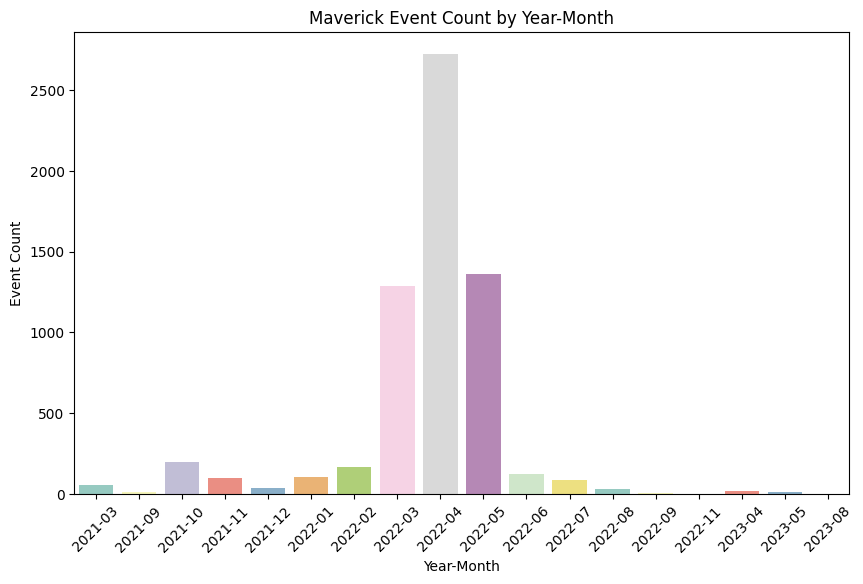

In [11]:
#Make a plot of Event Count by Year-Month for Maverick

import matplotlib.pyplot as plt
import seaborn as sns
# Group by 'year_month' and count 'event_id'
event_counts = maverick.groupby('year_month')['event-id'].nunique().reset_index()
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar plot using Seaborn
sns.barplot(x='year_month', y='event-id', data=event_counts, palette="Set3")

# Set labels and title
plt.xlabel('Year-Month',color = 'black')
plt.ylabel('Event Count', color= 'black')
plt.title('Maverick Event Count by Year-Month',color = 'black')

# Set the color of the x-axis and y-axis labels to white
plt.xticks(color='black')
plt.yticks(color='black')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

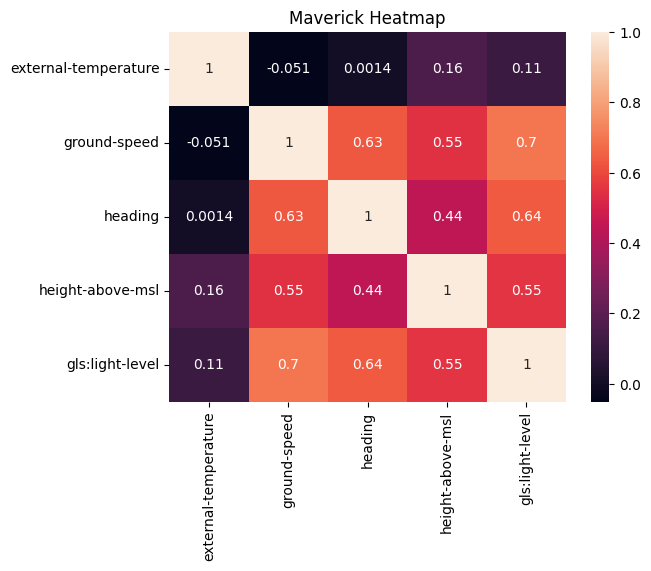

In [12]:
#maverick's Correlelation Heatmap
#sns.heatmap(maverick[['external-temperature','ground-speed', 'heading', 'height-above-msl', 'gls:light-level']].corr(),annot = True)


# Create a heatmap with Seaborn
ax = sns.heatmap(maverick[['external-temperature','ground-speed', 'heading', 'height-above-msl', 'gls:light-level']].corr(),annot = True)


# Define properties for the label text
label_text_properties = {'color': 'black'}  # Change 'red' to your desired font color

# Apply the label text properties to the heatmap
ax.set_yticklabels(ax.get_yticklabels(), **label_text_properties)
ax.set_xticklabels(ax.get_xticklabels(), **label_text_properties)
plt.title('Maverick Heatmap')
plt.show()

In [13]:
#mavericks average movement by season
maverick.groupby('season')[['ground-speed','heading','height-above-msl']].mean()

,ground-speed,heading,height-above-msl
season,,,
Fall,0.245513,10.240385,279.018269
Spring,4.013681,91.615533,456.517642
Summer,0.287045,8.276518,533.792308
Winter,0.146429,5.198377,295.991883


In [14]:
#mavericks average movement by time of the day
maverick.groupby('time_of_the_day')[['ground-speed','heading','height-above-msl']].mean()

,ground-speed,heading,height-above-msl
time_of_the_day,,,
Afternoon,5.869800,130.251233,581.266025
Dawn,1.803838,39.751272,364.875761
Evening,5.030120,117.654518,474.942369
Morning,0.183886,12.167773,354.314218


# Moe

In [15]:
from datetime import datetime

# Find the minimum date
min_date = pd.to_datetime(moe['date']).min().date()

# Get today's date
today = datetime.today().date()

# Calculate the number of days
days_difference = (today - min_date).days

print("Number of days between the minimum date and today:", days_difference)

Number of days between the minimum date and today: 449


In [17]:
#number of dates which moe has pinged
moe['date'].nunique()

74

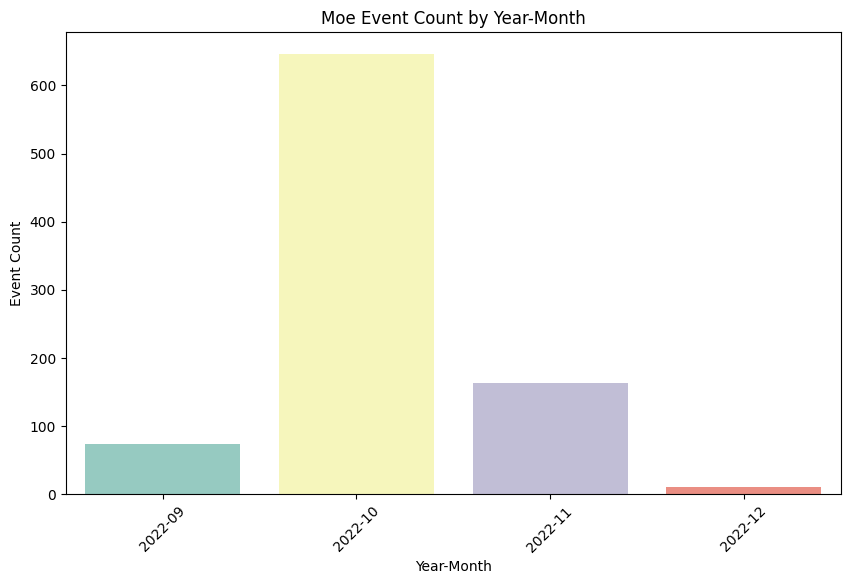

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group by 'year_month' and count 'event_id'
event_counts = moe.groupby('year_month')['event-id'].nunique().reset_index()
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar plot using Seaborn
sns.barplot(x='year_month', y='event-id', data=event_counts, palette="Set3")

# Set labels and title
plt.xlabel('Year-Month',color = 'black')
plt.ylabel('Event Count', color= 'black')
plt.title('Moe Event Count by Year-Month',color = 'black')

# Set the color of the x-axis and y-axis labels to white
plt.xticks(color='black')
plt.yticks(color='black')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

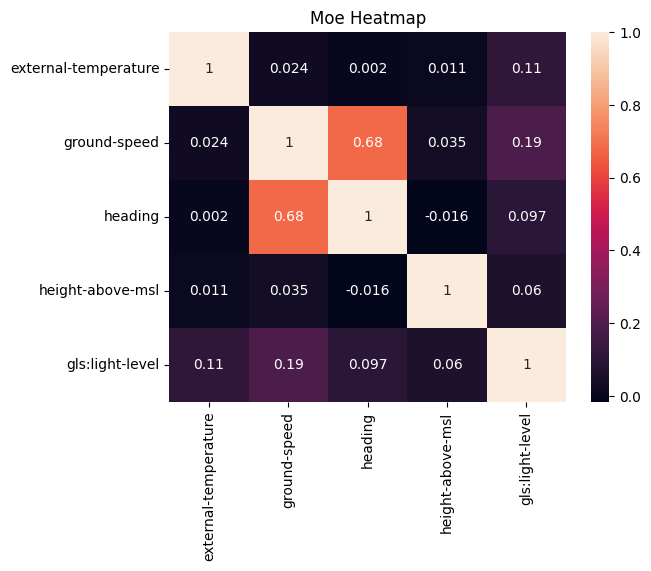

In [46]:
#Moe's Heatmap
# Create a heatmap with Seaborn
ax = sns.heatmap(moe[['external-temperature','ground-speed', 'heading', 'height-above-msl', 'gls:light-level']].corr(),annot = True)


# Define properties for the label text
label_text_properties = {'color': 'black'}  # Change 'red' to your desired font color

# Apply the label text properties to the heatmap
ax.set_yticklabels(ax.get_yticklabels(), **label_text_properties)
ax.set_xticklabels(ax.get_xticklabels(), **label_text_properties)
plt.title('Moe Heatmap')
plt.show()

In [47]:
#Moe's Average movement by season
moe.groupby('season')[['ground-speed','heading','height-above-msl']].mean()

,ground-speed,heading,height-above-msl
season,,,
Fall,0.330272,3.122449,273.020408
Winter,0.018182,0.000000,271.890909


In [ ]:
#Moe's average movement by time of the day
moe.groupby('time_of_the_day')[['ground-speed','heading','height-above-msl']].mean()

# Mcdonnell

In [37]:
mcdonnell = pd.read_csv("/content/drive/MyDrive/Capstone/LocationData-GNSS-[20230409-20231112].csv")
mcdonnell_environment = pd.read_csv("/content/drive/MyDrive/Capstone/EnvironmentData-Environment-[20230409-20231112].csv")
mcdonnell_odba = pd.read_csv("/content/drive/MyDrive/Capstone/AlgorithmData-ODBA-[20230409-20231112].csv")

#convert time to datetime
mcdonnell['Collecting time'] = pd.to_datetime(mcdonnell['Collecting time'])


#use dt.floor to convert the datime object to be rounded to the nearest hour
mcdonnell['Collecting time'] = mcdonnell['Collecting time'].dt.floor('T')
mcdonnell_environment['Collecting time'] = pd.to_datetime(mcdonnell_environment['Collecting time'])
mcdonnell_environment['Collecting time']  = mcdonnell_environment['Collecting time'].dt.floor('T')
mcdonnell_odba['Collecting time'] = pd.to_datetime(mcdonnell_odba['Collecting time'])
mcdonnell_odba['Collecting  time'] = mcdonnell_odba['Collecting time'].dt.floor('T')


mcdonnell = pd.merge(left = mcdonnell, right = mcdonnell_environment, on = 'Collecting time', how = 'left')
mcdonnell = pd.merge(left = mcdonnell, right = mcdonnell_odba, on = 'Collecting time', how = 'left')

mcdonnell['date'] = mcdonnell['Collecting time'].dt.date

# Add a "season" column
mcdonnell['season'] = mcdonnell['Collecting time'].dt.month.apply(get_season)

# Create a new column for year and month
mcdonnell['year_month'] = mcdonnell['Collecting time'].dt.strftime('%Y-%m')
mcdonnell['month'] = mcdonnell['Collecting time'].dt.month
mcdonnell['year'] = mcdonnell['Collecting time'].dt.year
# Add a "time of the day" column
mcdonnell['time_of_the_day'] = mcdonnell['Collecting time'].dt.hour.apply(get_time_of_day)

mcdonnell = mcdonnell[mcdonnell['Longitude'] != 200]
mcdonnell.head()


,UUID_x,Transmitting time_x,Collecting time,Longitude,Latitude,Altitude,Altitude (Ellipsoid),Speed,Course,Satellite used,...,UUID,Transmitting time,ODBA,Collecting time,date,season,year_month,month,year,time_of_the_day
0,1200000668,2023-05-04T16:01:10.168Z,2023-04-29 18:26:00+00:00,-78.770131,42.745578,256.3,220.5,0.0,0.0,5,...,NaN,NaN,NaN,NaT,2023-04-29,Spring,2023-04,4,2023,Evening
1,1200000668,2023-05-04T16:01:10.169Z,2023-04-29 21:00:00+00:00,-78.769754,42.747690,286.7,250.9,0.0,0.0,8,...,NaN,NaN,NaN,NaT,2023-04-29,Spring,2023-04,4,2023,Dawn
2,1200000668,2023-05-04T16:01:10.17Z,2023-04-30 00:00:00+00:00,-78.770394,42.747155,269.1,233.3,0.0,0.0,5,...,NaN,NaN,NaN,NaT,2023-04-30,Spring,2023-04,4,2023,Dawn
3,1200000668,2023-05-04T16:01:10.17Z,2023-04-30 03:01:00+00:00,-78.770259,42.747078,252.6,216.8,0.0,0.0,4,...,NaN,NaN,NaN,NaT,2023-04-30,Spring,2023-04,4,2023,Dawn
4,1200000668,2023-05-04T16:01:10.171Z,2023-04-30 06:00:00+00:00,-78.770368,42.747146,278.8,243.0,0.0,0.0,6,...,NaN,NaN,NaN,NaT,2023-04-30,Spring,2023-04,4,2023,Morning


In [38]:
# Find the minimum date
min_date = pd.to_datetime(mcdonnell['date']).min().date()

# Get today's date
today = datetime.today().date()

# Calculate the number of days
days_difference = (today - min_date).days

print("Number of days between the minimum date and today:", days_difference)

Number of days between the minimum date and today: 229


In [39]:
mcdonnell_date_count = mcdonnell[mcdonnell['Longitude']!=200].groupby("date")["time_of_the_day"].nunique().reset_index()
#count of dates with at least all 4 dates
mcdonnell_date_count['time_of_the_day'].value_counts()

4    180
2      1
3      1
Name: time_of_the_day, dtype: int64

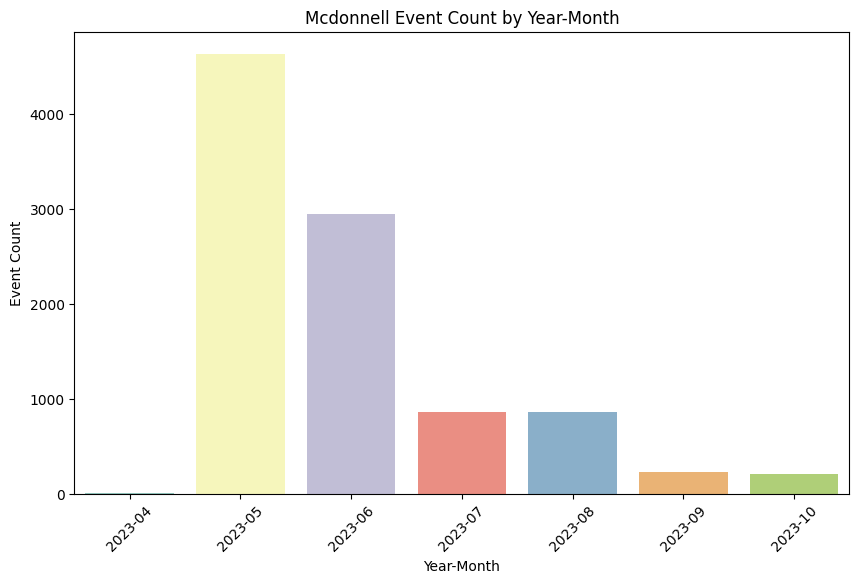

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group by 'year_month' and count 'event_id'
event_counts = mcdonnell[mcdonnell['Longitude']!=200].groupby('year_month')['Collecting time'].nunique().reset_index()
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar plot using Seaborn
sns.barplot(x='year_month', y='Collecting time', data=event_counts, palette="Set3")

# Set labels and title
plt.xlabel('Year-Month',color = 'black')
plt.ylabel('Event Count', color= 'black')
plt.title('Mcdonnell Event Count by Year-Month',color = 'black')

# Set the color of the x-axis and y-axis labels to white
plt.xticks(color='black')
plt.yticks(color='black')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

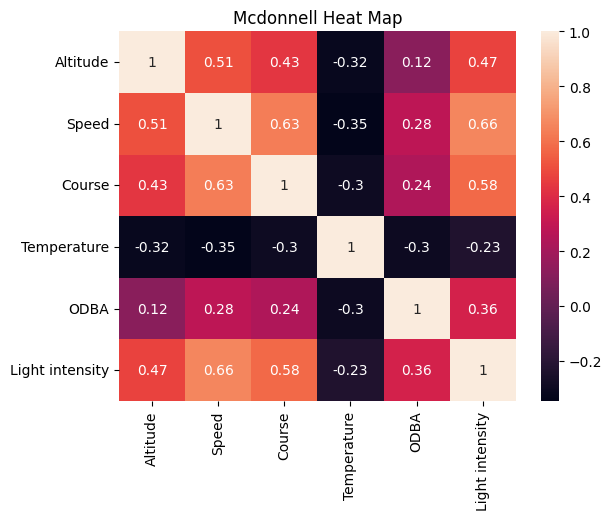

In [42]:
import seaborn as sns
#sns.heatmap(mcdonnell[['Altitude','Speed','Course','Temperature','ODBA','Light intensity']].corr(), annot = True)

# Create a heatmap with Seaborn
ax = sns.heatmap(mcdonnell[['Altitude','Speed','Course','Temperature','ODBA','Light intensity']].corr(), annot = True)


# Define properties for the label text
label_text_properties = {'color': 'black'}  # Change 'red' to your desired font color

# Apply the label text properties to the heatmap
ax.set_yticklabels(ax.get_yticklabels(), **label_text_properties)
ax.set_xticklabels(ax.get_xticklabels(), **label_text_properties)
plt.title('Mcdonnell Heat Map')

plt.show()



In [41]:
mcdonnell.drop_duplicates(inplace = True)
mcdonnell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21586 entries, 0 to 21613
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   UUID_x                21586 non-null  int64              
 1   Transmitting time_x   21586 non-null  object             
 2   Collecting time       21586 non-null  datetime64[ns, UTC]
 3   Longitude             21586 non-null  float64            
 4   Latitude              21586 non-null  float64            
 5   Altitude              21586 non-null  float64            
 6   Altitude (Ellipsoid)  21586 non-null  float64            
 7   Speed                 21586 non-null  float64            
 8   Course                21586 non-null  float64            
 9   Satellite used        21586 non-null  int64              
 10  Positioning mode      21586 non-null  int64              
 11  HorAccuracy           21586 non-null  float64            
 12  VerA

In [44]:
#mcdonnells average movement by time of the day
mcdonnell.groupby('time_of_the_day')[['Speed','Course','Altitude']].mean()

,Speed,Course,Altitude
time_of_the_day,,,
Afternoon,6.711430,125.256845,761.212075
Dawn,3.567584,69.942780,736.845133
Evening,7.820013,140.427971,819.525871
Morning,0.259228,9.194840,661.773594


In [45]:
#mcdonnells average movent by season
mcdonnell.groupby('season')[['Speed','Course','Altitude']].mean()

,Speed,Course,Altitude
season,,,
Fall,0.369214,9.470913,590.403609
Spring,6.158893,113.326053,787.565739
Summer,4.974308,93.538522,745.005885


# Statistical Significance Testing

## Maverick's Statistical analysis

In [48]:
#import stats library
from scipy import stats

In [50]:
#Create a dataframe that has all the means
maverick_means = maverick.groupby(['season','date'])['ground-speed','heading','height-above-msl'].mean().reset_index()

<ipython-input-50-6094415bef81>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  maverick_means = maverick.groupby(['season','date'])['ground-speed','heading','height-above-msl'].mean().reset_index()


In [51]:
#Create a sample for Statistical Testing
# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by 'Season' and take a sample of 59 rows from each group
for season, group in maverick_means.groupby('season'):
    if len(group) >= 59:  # Check if there are at least 59 rows for the season
        sampled_season = group.sample(n=59, random_state=42)  # Take a sample of 59 rows
        sampled_data = pd.concat([sampled_data, sampled_season])  # Concatenate sampled data

In [52]:
#Conduct Kruskal Wallis Test on Speed

#Import the Kruskal Wallis Test
from scipy.stats import kruskal

#Comparing speed across all seasons
speed_seasons = [sampled_data[sampled_data['season'] == season]['ground-speed'] for season in sampled_data['season'].unique()]

# Perform Kruskal-Wallis test for independent samples
statistic, p_value = kruskal(*speed_seasons)
print(f"Kruskal-Wallis test statistic: {statistic}")
#print(f"P-value: {p_value}")

Kruskal-Wallis test statistic: 48.89885049460393
P-value: 1.3707641055528222e-10


In [53]:
#Conduct Wilcoxon Test
from itertools import combinations
from scipy.stats import wilcoxon

# Assuming 'sampled_data' is your DataFrame with columns 'Season' and 'ground-speed'

# Get unique seasons from the DataFrame
unique_seasons = sampled_data['season'].unique()

# Perform Wilcoxon signed-rank test for each pair of seasons
for season1, season2 in combinations(unique_seasons, 2):
    speed_season_1 = sampled_data[sampled_data['season'] == season1]['ground-speed']
    speed_season_2 = sampled_data[sampled_data['season'] == season2]['ground-speed']

    # Perform Wilcoxon signed-rank test for the pair of seasons
    statistic, p_value = wilcoxon(speed_season_1, speed_season_2)
    print(f"Wilcoxon test for {season1} vs {season2}:")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {p_value}")
    print("-----------")

Wilcoxon test for Fall vs Spring:
Test statistic: 369.0
P-value: 9.8275296124746e-05
-----------
Wilcoxon test for Fall vs Summer:
Test statistic: 590.0
P-value: 0.0602347490498763
-----------
Wilcoxon test for Fall vs Winter:
Test statistic: 613.5
P-value: 0.18974465759944992
-----------
Wilcoxon test for Spring vs Summer:
Test statistic: 384.0
P-value: 0.0001558636993577359
-----------
Wilcoxon test for Spring vs Winter:
Test statistic: 206.5
P-value: 3.0328700984126467e-07
-----------
Wilcoxon test for Summer vs Winter:
Test statistic: 371.5
P-value: 0.0038334539737920567
-----------


In [54]:
#Conduct Kruskal Wallis Test for Mavericks Headingg

from scipy.stats import kruskal

# Example: Comparing heading across all seasons
heading_seasons = [sampled_data[sampled_data['season'] == season]['heading'] for season in sampled_data['season'].unique()]

# Perform Kruskal-Wallis test for independent samples
statistic, p_value = kruskal(*heading_seasons)
print(f"Kruskal-Wallis test statistic: {statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis test statistic: 53.961010823527275
P-value: 1.1437500545285665e-11


In [55]:
#Conduct Wilcoxon Test for Mavericks Heading

# Get unique seasons from the DataFrame
unique_seasons = sampled_data['season'].unique()

# Perform Wilcoxon signed-rank test for each pair of seasons
for season1, season2 in combinations(unique_seasons, 2):
    speed_season_1 = sampled_data[sampled_data['season'] == season1]['heading']
    speed_season_2 = sampled_data[sampled_data['season'] == season2]['heading']

    # Perform Wilcoxon signed-rank test for the pair of seasons
    statistic, p_value = wilcoxon(speed_season_1, speed_season_2)
    print(f"Wilcoxon test for {season1} vs {season2}:")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {p_value}")
    print("-----------")

Wilcoxon test for Fall vs Spring:
Test statistic: 258.0
P-value: 0.0020258376180012565
-----------
Wilcoxon test for Fall vs Summer:
Test statistic: 53.0
P-value: 0.2659466461059248
-----------
Wilcoxon test for Fall vs Winter:
Test statistic: 39.0
P-value: 0.04285796577660062
-----------
Wilcoxon test for Spring vs Summer:
Test statistic: 152.0
P-value: 6.257709054222622e-05
-----------
Wilcoxon test for Spring vs Winter:
Test statistic: 9.0
P-value: 1.0557659377729752e-07
-----------
Wilcoxon test for Summer vs Winter:
Test statistic: 31.0
P-value: 0.055719324352751155
-----------


In [56]:
#Conduct Kruskal Wallis Test for Mavericks Altitude

# Example: Comparing Altitude across all seasons
alt_seasons = [sampled_data[sampled_data['season'] == season]['height-above-msl'] for season in sampled_data['season'].unique()]

# Perform Kruskal-Wallis test for independent samples
statistic, p_value = kruskal(*alt_seasons)
print(f"Kruskal-Wallis test statistic: {statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis test statistic: 65.83184398487788
P-value: 3.329719695888393e-14


In [57]:
#Conduct Wilcoxon Test for Mavericks Altitude

# Get unique seasons from the DataFrame
unique_seasons = sampled_data['season'].unique()

# Perform Wilcoxon signed-rank test for each pair of seasons
for season1, season2 in combinations(unique_seasons, 2):
    speed_season_1 = sampled_data[sampled_data['season'] == season1]['height-above-msl']
    speed_season_2 = sampled_data[sampled_data['season'] == season2]['height-above-msl']

    # Perform Wilcoxon signed-rank test for the pair of seasons
    statistic, p_value = wilcoxon(speed_season_1, speed_season_2)
    print(f"Wilcoxon test for {season1} vs {season2}:")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {p_value}")
    print("-----------")

Wilcoxon test for Fall vs Spring:
Test statistic: 185.0
P-value: 1.2668130262448944e-07
-----------
Wilcoxon test for Fall vs Summer:
Test statistic: 83.0
P-value: 1.4175255581963745e-09
-----------
Wilcoxon test for Fall vs Winter:
Test statistic: 701.0
P-value: 0.16488518664451635
-----------
Wilcoxon test for Spring vs Summer:
Test statistic: 390.0
P-value: 0.0001867863764614671
-----------
Wilcoxon test for Spring vs Winter:
Test statistic: 245.0
P-value: 1.3605071152702404e-06
-----------
Wilcoxon test for Summer vs Winter:
Test statistic: 91.0
P-value: 2.058600976484614e-09
-----------


Heading(Angle from North)

## Moe's Statistical Analysis

In [58]:
#Get daily means of all Moe's movement variables
moe_means = moe.groupby(['season','date'])['ground-speed','heading','height-above-msl'].mean().reset_index()
moe_means.groupby('season').count()

<ipython-input-58-fead309f63f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  moe_means = moe.groupby(['season','date'])['ground-speed','heading','height-above-msl'].mean().reset_index()


,date,ground-speed,heading,height-above-msl
season,,,,
Fall,69,69,69,69
Winter,5,5,5,5


In [59]:
#Sample Moe's means

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by 'Season' and take a sample of 59 rows from each group
for season, group in moe_means.groupby('season'):
    if len(group) >= 5:  # Check if there are at least 59 rows for the season
        sampled_season = group.sample(n=5, random_state=42)  # Take a sample of 59 rows
        sampled_data = pd.concat([sampled_data, sampled_season])  # Concatenate sampled data

In [60]:
#Wilcoxon Test for Moe's Speed

# Get unique seasons from the DataFrame
unique_seasons = sampled_data['season'].unique()

# Perform Wilcoxon signed-rank test for each pair of seasons
for season1, season2 in combinations(unique_seasons, 2):
    speed_season_1 = sampled_data[sampled_data['season'] == season1]['ground-speed']
    speed_season_2 = sampled_data[sampled_data['season'] == season2]['ground-speed']

    # Perform Wilcoxon signed-rank test for the pair of seasons
    statistic, p_value = wilcoxon(speed_season_1, speed_season_2)
    print(f"Wilcoxon test for {season1} vs {season2}:")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {p_value}")
    print("-----------")

Wilcoxon test for Fall vs Winter:
Test statistic: 0.0
P-value: 0.0625
-----------


In [61]:
#Wilcoxon Test for Moe's Heading
# Perform Wilcoxon signed-rank test for each pair of seasons
for season1, season2 in combinations(unique_seasons, 2):
    speed_season_1 = sampled_data[sampled_data['season'] == season1]['heading']
    speed_season_2 = sampled_data[sampled_data['season'] == season2]['heading']

    # Perform Wilcoxon signed-rank test for the pair of seasons
    statistic, p_value = wilcoxon(speed_season_1, speed_season_2)
    print(f"Wilcoxon test for {season1} vs {season2}:")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {p_value}")
    print("-----------")

Wilcoxon test for Fall vs Winter:
Test statistic: 0.0
P-value: 0.17971249487899976
-----------


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [62]:
#Wilcoxon Test for Moe's Altitude
#Get unique seasons from the DataFrame
unique_seasons = sampled_data['season'].unique()

# Perform Wilcoxon signed-rank test for each pair of seasons
for season1, season2 in combinations(unique_seasons, 2):
    speed_season_1 = sampled_data[sampled_data['season'] == season1]['height-above-msl']
    speed_season_2 = sampled_data[sampled_data['season'] == season2]['height-above-msl']

    # Perform Wilcoxon signed-rank test for the pair of seasons
    statistic, p_value = wilcoxon(speed_season_1, speed_season_2)
    print(f"Wilcoxon test for {season1} vs {season2}:")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {p_value}")
    print("-----------")

Wilcoxon test for Fall vs Winter:
Test statistic: 4.0
P-value: 0.4375
-----------


## Mcdonnell's Statistical Test

In [73]:
#Read in Mcdonnells Data
mcdonnell = pd.read_csv("/content/drive/MyDrive/Capstone/LocationData-GNSS-[20230409-20231112].csv")
mcdonnell['Collecting time'] = pd.to_datetime(mcdonnell['Collecting time'])

# Add a "season" column
mcdonnell['season'] = mcdonnell['Collecting time'].dt.month.apply(get_season)
mcdonnell['date'] = mcdonnell['Collecting time'].dt.date

# Create a new column for year and month
mcdonnell['year_month'] = mcdonnell['Collecting time'].dt.strftime('%Y-%m')
mcdonnell['month'] = mcdonnell['Collecting time'].dt.month
mcdonnell['year'] = mcdonnell['Collecting time'].dt.year
# Add a "time of the day" column
mcdonnell['time_of_the_day'] = mcdonnell['Collecting time'].dt.hour.apply(get_time_of_day)
mcdonnell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12759 entries, 0 to 12758
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   UUID                  12759 non-null  int64              
 1   Transmitting time     12759 non-null  object             
 2   Collecting time       12759 non-null  datetime64[ns, UTC]
 3   Longitude             12759 non-null  float64            
 4   Latitude              12759 non-null  float64            
 5   Altitude              12759 non-null  float64            
 6   Altitude (Ellipsoid)  12759 non-null  float64            
 7   Speed                 12759 non-null  float64            
 8   Course                12759 non-null  float64            
 9   Satellite used        12759 non-null  int64              
 10  Positioning mode      12759 non-null  int64              
 11  HorAccuracy           12759 non-null  float64            
 12  VerA

In [75]:
#Create a dataframe of means for Mcdonnell
mcd_means = mcdonnell.groupby(['season','date'])['Speed','Course','Altitude'].mean().reset_index()
mcd_means.groupby(['season']).count()

<ipython-input-75-82637dbb165b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mcd_means = mcdonnell.groupby(['season','date'])['Speed','Course','Altitude'].mean().reset_index()


,date,Speed,Course,Altitude
season,,,,
Fall,57,57,57,57
Spring,33,33,33,33
Summer,92,92,92,92


In [76]:
#Sample the means from the dataframe
# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by 'Season' and take a sample of 59 rows from each group
for season, group in mcd_means.groupby('season'):
    if len(group) >= 33:  # Check if there are at least 59 rows for the season
        sampled_season = group.sample(n=8, random_state=42)  # Take a sample of 59 rows
        sampled_data = pd.concat([sampled_data, sampled_season])  # Concatenate sampled data

In [77]:
#Perform Kruskal Wallis Test for Mcdonnell
# Example: Comparing speed across all seasons
speed_seasons = [sampled_data[sampled_data['season'] == season]['Speed'] for season in sampled_data['season'].unique()]

# Perform Kruskal-Wallis test for independent samples
statistic, p_value = kruskal(*speed_seasons)
print(f"Kruskal-Wallis test statistic: {statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis test statistic: 9.69558566433566
P-value: 0.007845675174689516


In [78]:
#Perform Wilcoxon Ranked Test for Mcdonnells Speed

# Get unique seasons from the DataFrame
unique_seasons = sampled_data['season'].unique()

# Perform Wilcoxon signed-rank test for each pair of seasons
for season1, season2 in combinations(unique_seasons, 2):
    speed_season_1 = sampled_data[sampled_data['season'] == season1]['Speed']
    speed_season_2 = sampled_data[sampled_data['season'] == season2]['Speed']

    # Perform Wilcoxon signed-rank test for the pair of seasons
    statistic, p_value = wilcoxon(speed_season_1, speed_season_2)
    print(f"Wilcoxon test for {season1} vs {season2}:")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {p_value}")
    print("-----------")

Wilcoxon test for Fall vs Spring:
Test statistic: 0.0
P-value: 0.0078125
-----------
Wilcoxon test for Fall vs Summer:
Test statistic: 7.0
P-value: 0.23672357063785732
-----------
Wilcoxon test for Spring vs Summer:
Test statistic: 9.0
P-value: 0.25
-----------


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [69]:
#Conduct Kruskal Wallis Test for Mcdonnell's Altitude
# Example: Comparing speed across all seasons
alt_seasons = [sampled_data[sampled_data['season'] == season]['Altitude'] for season in sampled_data['season'].unique()]

# Perform Kruskal-Wallis test for independent samples
statistic, p_value = kruskal(*alt_seasons)
print(f"Kruskal-Wallis test statistic: {statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis test statistic: 8.685000000000002
P-value: 0.013003977588151673


In [79]:
#Perform Wilcoxon Ranked Test for Mcdonnell's Altitudd

# Get unique seasons from the DataFrame
unique_seasons = sampled_data['season'].unique()


# Perform Wilcoxon signed-rank test for each pair of seasons
for season1, season2 in combinations(unique_seasons, 2):
    speed_season_1 = sampled_data[sampled_data['season'] == season1]['Altitude']
    speed_season_2 = sampled_data[sampled_data['season'] == season2]['Altitude']

    # Perform Wilcoxon signed-rank test for the pair of seasons
    statistic, p_value = wilcoxon(speed_season_1, speed_season_2)
    print(f"Wilcoxon test for {season1} vs {season2}:")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {p_value}")
    print("-----------")

Wilcoxon test for Fall vs Spring:
Test statistic: 2.0
P-value: 0.0234375
-----------
Wilcoxon test for Fall vs Summer:
Test statistic: 5.0
P-value: 0.078125
-----------
Wilcoxon test for Spring vs Summer:
Test statistic: 9.0
P-value: 0.25
-----------


In [71]:
#Conduct Kruskal Wallis Test for Mcdonnels Heading

# Example: Comparing speed across all seasons
cor_seasons = [sampled_data[sampled_data['season'] == season]['Course'] for season in sampled_data['season'].unique()]

# Perform Kruskal-Wallis test for independent samples
statistic, p_value = kruskal(*cor_seasons)
print(f"Kruskal-Wallis test statistic: {statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis test statistic: 7.888719512195122
P-value: 0.019363609834960008


In [80]:
#Conduct Wilcoxon Ranked Test for Mcdonnells Heading

# Get unique seasons from the DataFrame
unique_seasons = sampled_data['season'].unique()

# Perform Wilcoxon signed-rank test for each pair of seasons
for season1, season2 in combinations(unique_seasons, 2):
    speed_season_1 = sampled_data[sampled_data['season'] == season1]['Course']
    speed_season_2 = sampled_data[sampled_data['season'] == season2]['Course']

    # Perform Wilcoxon signed-rank test for the pair of seasons
    statistic, p_value = wilcoxon(speed_season_1, speed_season_2)
    print(f"Wilcoxon test for {season1} vs {season2}:")
    print(f"Test statistic: {statistic}")
    print(f"P-value: {p_value}")
    print("-----------")

Wilcoxon test for Fall vs Spring:
Test statistic: 0.0
P-value: 0.0078125
-----------
Wilcoxon test for Fall vs Summer:
Test statistic: 3.0
P-value: 0.11585149752593009
-----------
Wilcoxon test for Spring vs Summer:
Test statistic: 9.0
P-value: 0.25
-----------
